In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path='ecommerce Store.xlsx'
df=pd.read_excel(file_path)

In [3]:
#Preview dataset 
print("\nFirst 5 Rows:\n",df.head())
print("\nLast 5 Rows:\n",df.tail())
print("\nSummary Statistics:\n",df.describe())
print("\nColumns:\n",df.columns)


First 5 Rows:
    index             Order ID  Cust ID Gender  Age       Date     Status  \
0      1  171-1029312-3038738  1029312  Women   44 2022-12-04  Delivered   
1      2  405-2183842-2225946  2183842  Women   29 2022-12-04  Delivered   
2      3  171-1641533-8921966  1641533  Women   67 2022-12-04  Delivered   
3      4  404-7490807-6300351  7490807  Women   20 2022-12-04  Delivered   
4      5  403-9293516-4577154  9293516  Women   62 2022-12-04  Delivered   

  Channel                       SKU Category Size Qty currency  Amount  \
0   Myntra  JNE1233-BLUE-KR-031-XXL    kurta  XXL   1      INR     376   
1     Ajio           SET414-KR-NP-L      Set    L   1      INR    1449   
2   Myntra           SET261-KR-PP-S      Set    S   1      INR     453   
3   Amazon           SET110-KR-PP-M      Set    M   1      INR     729   
4   Myntra         JNE2294-KR-A-XXL    kurta  XXL   1      INR     544   

   ship-city   ship-state  ship-postal-code ship-country    B2B  
0     MOHALI    

In [4]:
#Standardize Gender column
df['Gender']=df['Gender'].replace({'W':"Women",'M':"Men"})

DATA Cleaning

In [5]:
#Convert QTY text to numeric
df['Qty']=df['Qty'].replace({'One':1,'Two':2})

C:\Users\HP\AppData\Local\Temp\ipykernel_17240\2944317069.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Qty']=df['Qty'].replace({'One':1,'Two':2})


In [6]:
#Standardize City/Store names
df['ship-city']=df['ship-city'].str.upper()
df['ship-state']=df['ship-state'].str.upper()

In [7]:
#Categorize age groups
def categorize_age(age):
    if age>60:
        return 'Above 60'
    elif age >=20:
        return '20 to 60'
    return 'Below 20'
df['Age Group']=df['Age'].apply(categorize_age)    

In [8]:
# Convert date to datetime and extarct month
df['date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Month']=df['Date'].dt.month_name()

In [9]:
#Convert bolean B2B column to text
df['Bussines Type']=df['B2B'].replace({False:'B2c',True:'B2B'})

Start Visulazation

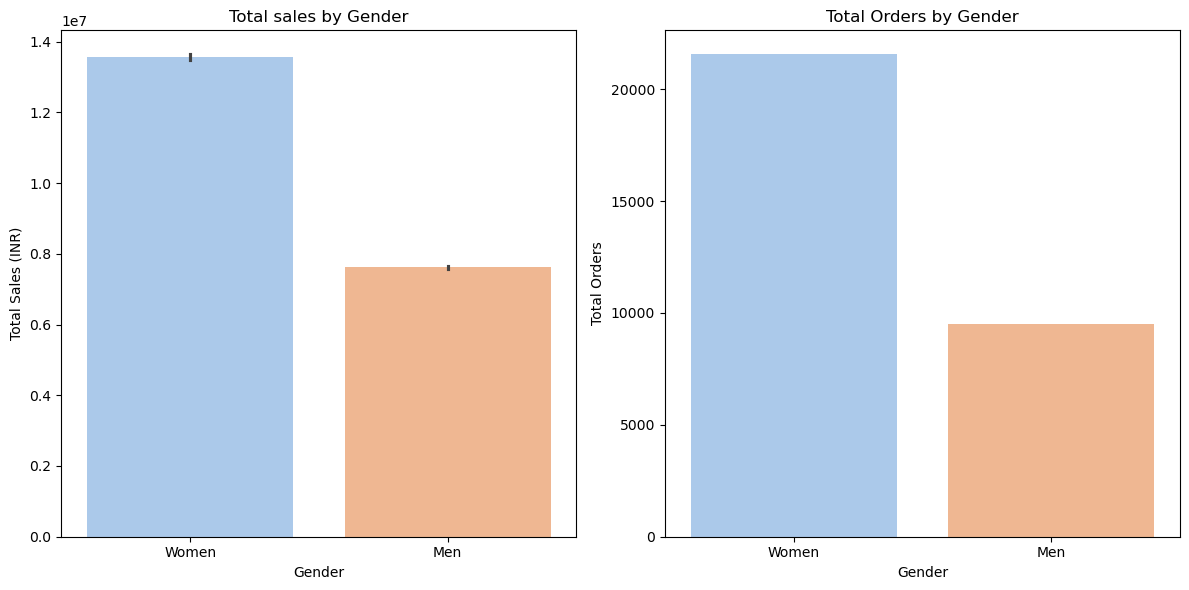

In [10]:
#Sales & Orders by Gender
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=df,x='Gender',y='Amount',estimator=sum,hue='Gender',palette='pastel',legend=False)
plt.title('Total sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales (INR)')
#Total orders by gender
plt.subplot(1,2,2)
sns.countplot(data=df,x='Gender',hue='Gender',palette='pastel',legend=False)
plt.title('Total Orders by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

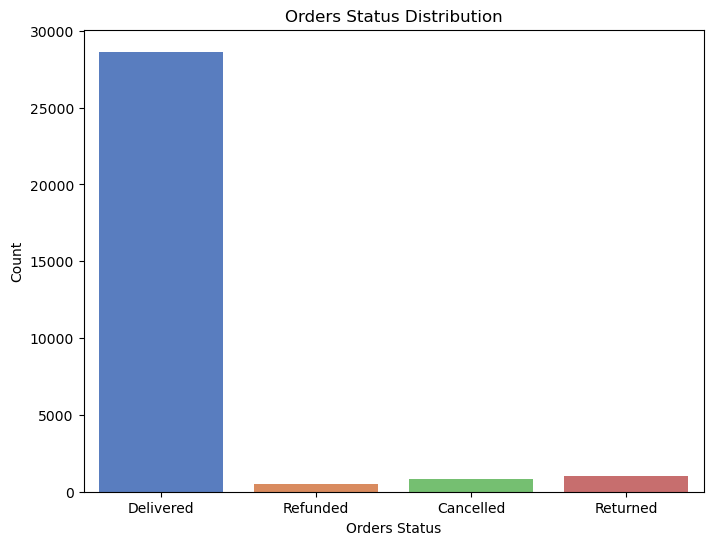

In [11]:
#order status distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Status',hue='Status',palette='muted',legend=False)
plt.title('Orders Status Distribution')
plt.xlabel('Orders Status')
plt.ylabel('Count')
plt.show()

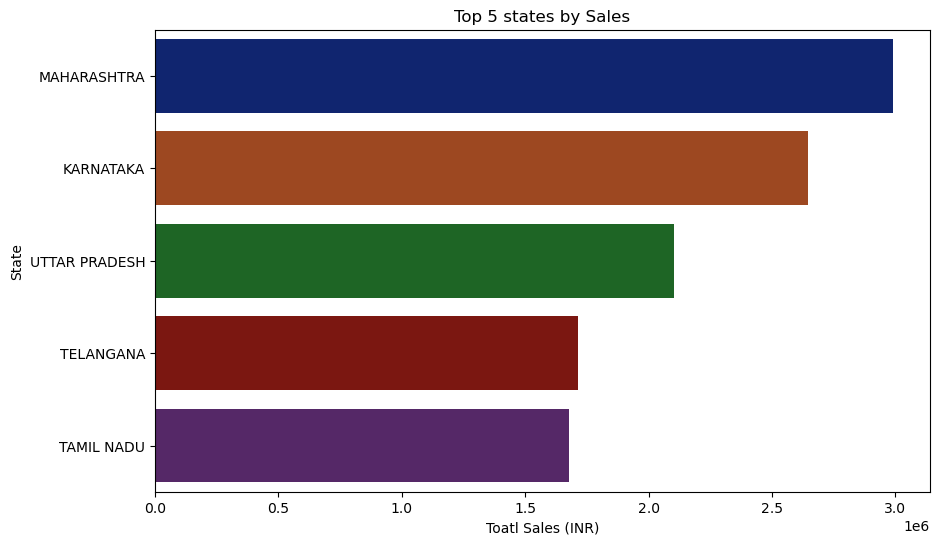

In [12]:
#Top 5 states by Sales
top_states =df.groupby('ship-state')['Amount'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_states,x='Amount',y='ship-state',hue='ship-state',palette='dark',legend=False)
plt.title('Top 5 states by Sales')
plt.xlabel('Toatl Sales (INR)')
plt.ylabel('State')
plt.show()

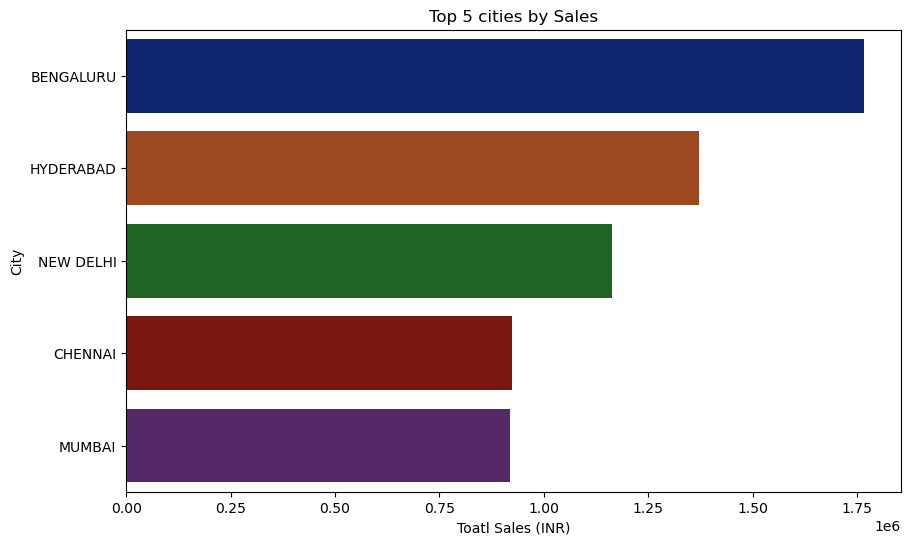

In [13]:
#Top 5 states by Sales
top_cities =df.groupby('ship-city')['Amount'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=top_cities,x='Amount',y='ship-city',hue='ship-city',palette='dark',legend=False)
plt.title('Top 5 cities by Sales')
plt.xlabel('Toatl Sales (INR)')
plt.ylabel('City')
plt.show()


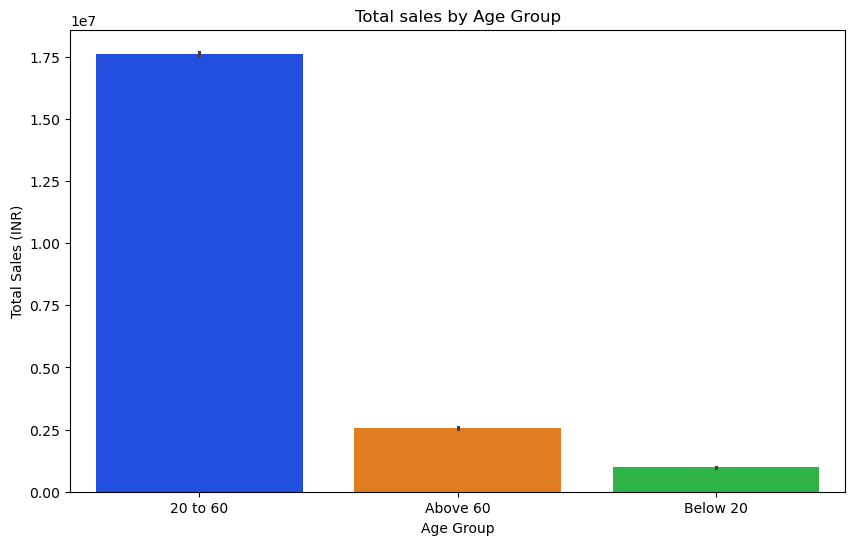

In [14]:
#Relationship :Age group vs Sales (Better Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Age Group',y='Amount',estimator=sum,hue='Age Group',palette='bright',legend=False)
plt.title('Total sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (INR)')
plt.show()


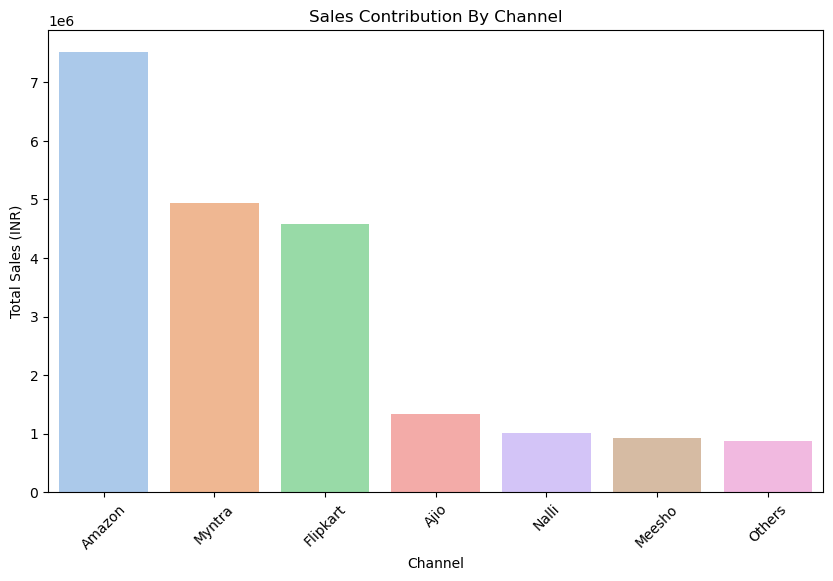

In [15]:
#Sales Contibution By Channel
channel_sales=df.groupby('Channel ')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=channel_sales.index,y=channel_sales.values,hue=channel_sales.index,palette='pastel',legend=False)
plt.title('Sales Contribution By Channel')
plt.xlabel('Channel')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

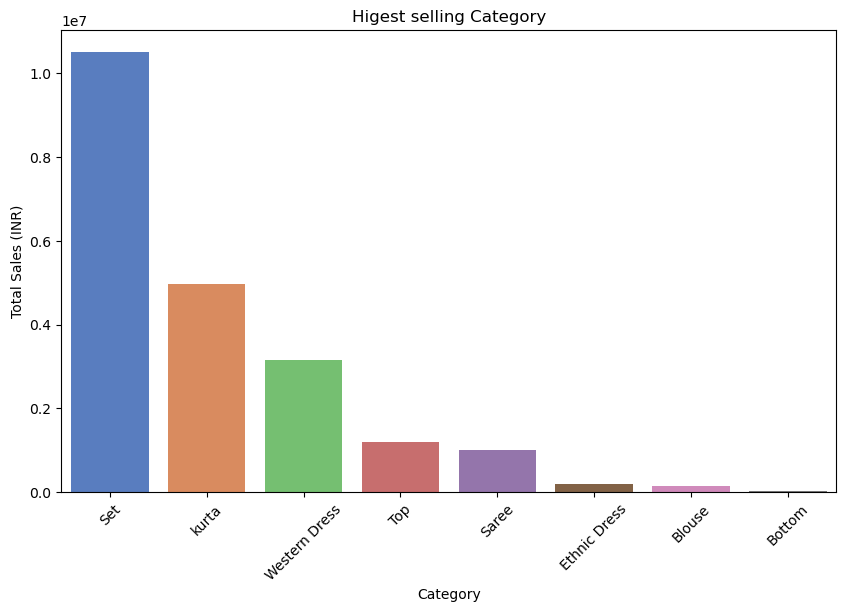

In [16]:
#Higest Selling Category
category_sales=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index,y=category_sales.values,hue=category_sales.index,palette='muted',legend=False)
plt.title('Higest selling Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

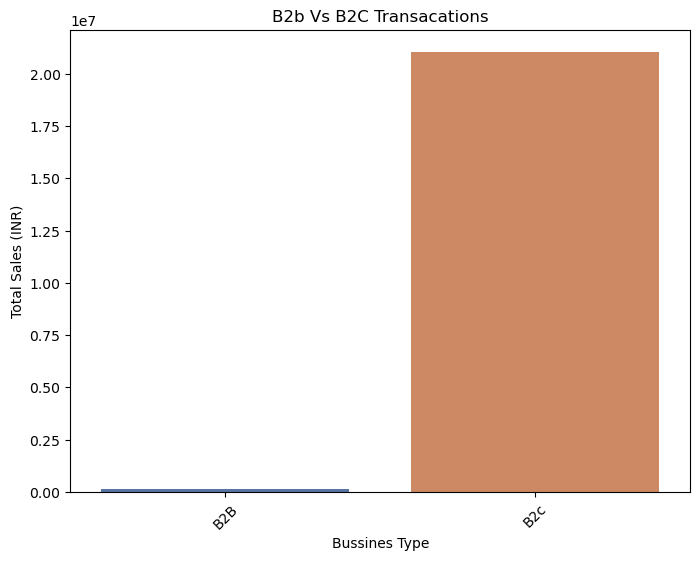

In [18]:
#B2B vs B2C sales
b2b_b2c_sales=df.groupby('Bussines Type')['Amount'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Bussines Type',y='Amount',data=b2b_b2c_sales,hue='Bussines Type',palette='deep',legend=False)
plt.title('B2b Vs B2C Transacations')
plt.xlabel('Bussines Type')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()